In [1]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import diffprivlib.models as dpm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings("ignore") #warnings.filterwarnings("default")

# Load data

In [10]:
raw_data = load_breast_cancer()
cancer_data = raw_data.data
cancer_target = raw_data.target

In [7]:
y = cancer_target
X = cancer_data

# X = preprocessing.normalize(X, norm='l2')

In [8]:
X.shape

(44932, 5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Baseline Model

In [72]:
pca = PCA(n_components=5)
tX_train = pca.fit_transform(X_train)
tX_test = pca.transform(X_test)

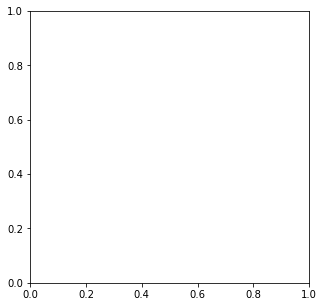

In [73]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# ax.scatter(tX_train[:, 0], tX_train[:, 1])

In [74]:
clf = LogisticRegression(random_state = 0, max_iter = 200).fit(tX_train, y_train)

In [75]:
print(f"Performance on training data {clf.score(tX_train, y_train)}")
print(f"Performance on test data {clf.score(tX_test, y_test)}")

opt_accuracy = clf.score(tX_test, y_test)

Performance on training data 0.7992225288584232
Performance on test data 0.7989851330900026


# PCA => DP Logistic Regression

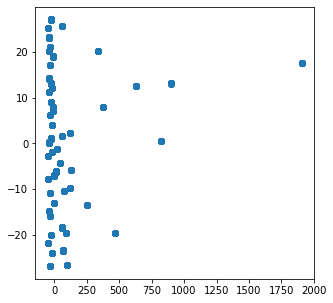

In [59]:
pca = PCA(n_components=5)
tX_train = pca.fit_transform(X_train)
tX_test = pca.transform(X_test)
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.scatter(tX_train[:, 0], tX_train[:, 1])
epsilons = np.logspace(-2, 2, 50)
curves = []
for _ in range(100):
    accuracy = []
    for epsilon in epsilons:
        dp_clf = dpm.LogisticRegression(epsilon=epsilon, max_iter = 200).fit(tX_train, y_train, )
        accuracy.append(dp_clf.score(tX_test, y_test))

    curves += [accuracy]


In [60]:
mean_score1 = np.mean(np.array(curves), axis = 0)

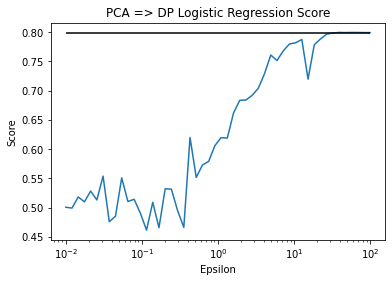

In [16]:
ax = plt.subplot(111)
ax.plot(epsilons, mean_score)
ax.set_title("PCA => DP Logistic Regression Score")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Score")
ax.set_xscale('log')
ax.hlines(opt_accuracy, epsilons[0],epsilons[-1] , color = "black")

# DP PCA => Logistic Regression

In [23]:
np.logspace(-2, 2, 50)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [92]:
dp_pca.components_

array([[ 9.99715822e-01, -1.60246073e-02, -6.23041930e-03,
        -1.14122837e-02, -1.19343460e-02],
       [ 1.83977927e-02,  9.82887025e-01, -1.61204483e-02,
         5.99938295e-02,  1.72439811e-01],
       [ 7.69444137e-03,  1.65172348e-02,  2.96746533e-01,
         8.78905471e-01, -3.73007567e-01],
       [ 1.30597499e-02, -1.66618165e-01,  3.37554077e-01,
         2.65675554e-01,  8.87435392e-01],
       [-1.86354984e-04,  7.51124196e-02,  8.93140557e-01,
        -3.91423266e-01, -2.08436712e-01]])

In [95]:
epsilons = np.logspace(-2, 2, 50)
curves = []
for i in range(1):
    accuracy = []
    print(i)
    for epsilon in epsilons:
        dp_pca = dpm.PCA(n_components=5, epsilon = epsilon)
        tX_train = dp_pca.fit_transform(X_train)
        tX_test = dp_pca.transform(X_test)
        dp_clf = LogisticRegression(max_iter = 200).fit(tX_train, y_train, )
        accuracy.append(dp_clf.score(tX_test, y_test))

    curves += [accuracy]


0


In [96]:
mean_score2 = np.mean(np.array(curves), axis = 0)

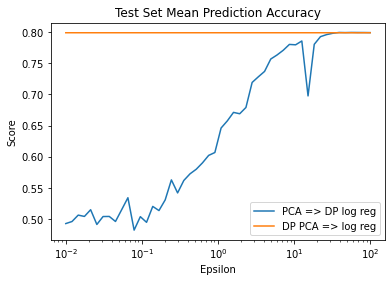

In [97]:
ax = plt.subplot(111)
ax.plot(epsilons, mean_score1, label = "PCA => DP log reg")
ax.plot(epsilons, mean_score2, label = "DP PCA => log reg")
ax.set_title("Test Set Mean Prediction Accuracy")
ax.legend()
ax.set_xlabel("Epsilon")
ax.set_ylabel("Score")
ax.set_xscale('log')
# ax.hlines(opt_accuracy, epsilons[0],epsilons[-1] , color = "black")

In [19]:
clf_dfPCA = LogisticRegression(random_state = 0, max_iter = 200).fit(tX_train, y_train[1:15000])
print(f"Performance on training data {clf_dfPCA.score(tX_train, y_train[1:15000])}")
print(f"Performance on test data {clf_dfPCA.score(tX_test, y_test)}")

Performance on training data 0.8025868391226082
Performance on test data 0.7993412267426333
